In this program, I visualize the Tully catalogue of galaxies with 3000 km/s of us.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from astropy.io import fits
%matplotlib inline

In [2]:
hdulist = fits.open('Tully_all.fit')
tbdata = hdulist[1].data

In [3]:
hdulist.info()
header = hdulist[1].header

# had to edit the format of a couple columns from F5 to F5.1, 
#fits.setval('Tully_all.fit', 'TFORM12', value='F5.1',ext=1)
#fits.setval('Tully_all.fit', 'TFORM10', value='F3.1',ext=1)

Filename: Tully_all.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      61   ()              
1    VII_145_catalog  TableHDU       105   2367R x 22C   ['I4', 'A8', 'A7', 'A6', 'I2', 'A2', 'F5.1', 'F5.1', 'F5.2', 'F3.1', 'F5.2', 'F5.1', 'I3', 'F6.2', 'F6.2', 'F6.2', 'F5.2', 'F4.1', 'F5.1', 'F5.1', 'F5.1', 'A40']   


In [4]:
SGX_val = tbdata.field('SGX')
SGY_val = tbdata.field('SGY')
SGZ_val = tbdata.field('SGZ')
RVel_val = tbdata.field('RVel')

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


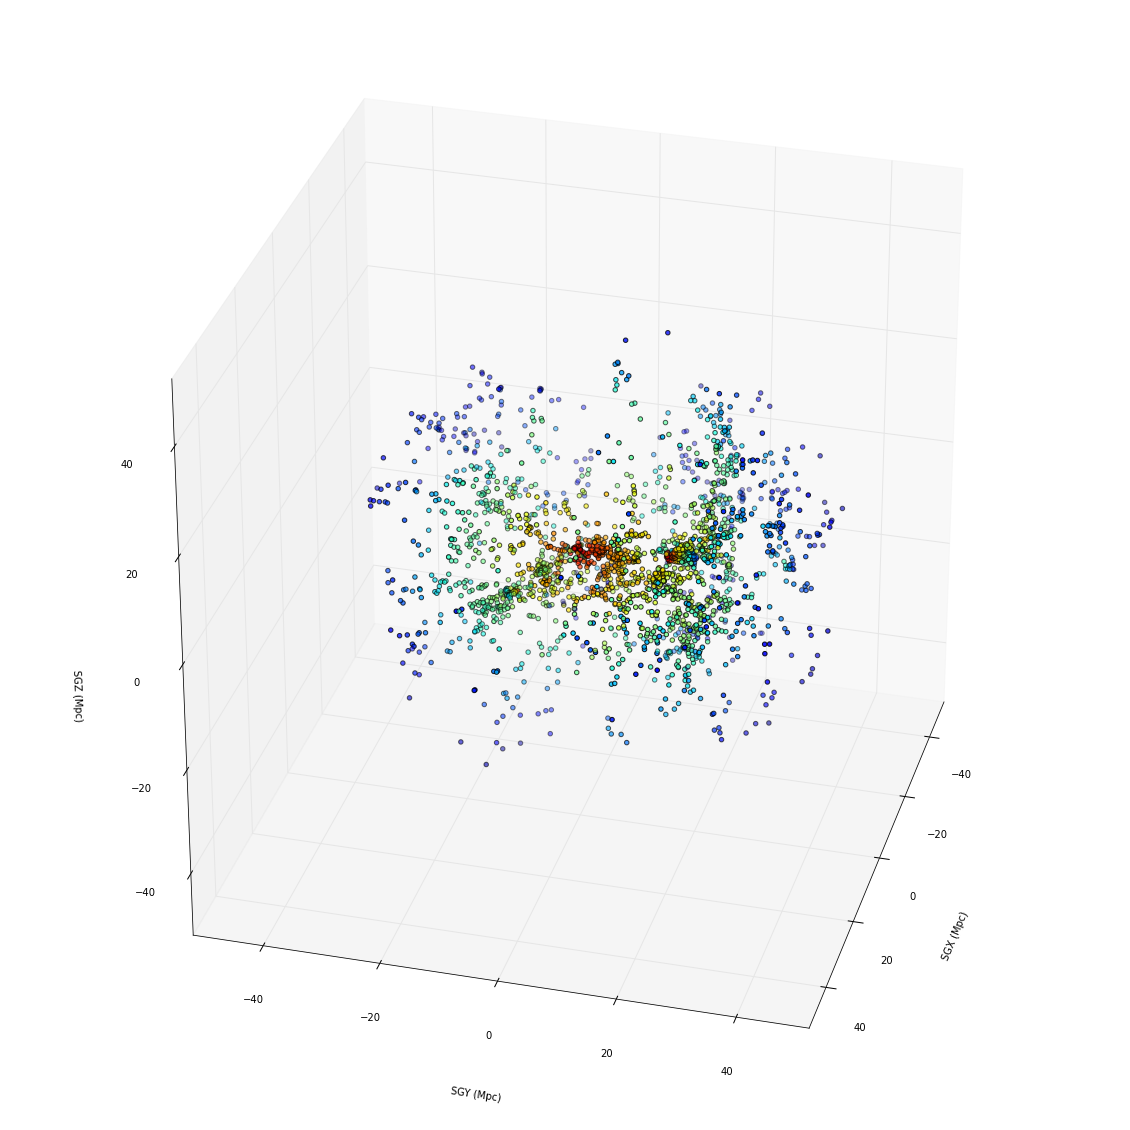

In [5]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(SGX_val,SGY_val,SGZ_val,c = (256. - RVel_val/max(RVel_val)*256.) )
ax.set_xlabel('SGX (Mpc)')
ax.set_ylabel('SGY (Mpc)')
ax.set_zlabel('SGZ (Mpc)')
# rotate the axes and update
#for angle in range(0, 360):
ax.view_init(30, 15)
#    plt.draw()
#    plt.pause(.001)

This catalogue goes out to z~0.01 (systemic velocities less than 3000km/s).

As distance/redshift/systemic velocity increases, I could plot the angular size (analytic curve).  
I could add onto this plot data points (the size of specific galaxies/galaxy groups at discrete points).


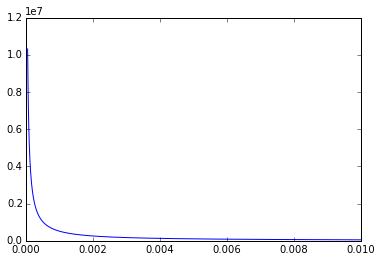

In [8]:
z = np.arange(0.00005,0.01,0.000005)
size = 10.  # arbitrary number (Mpc)
# angular diameter distance in Einstein de Sitter universe (not correct):
d_A = 2.*3e5/(75.) * 1./(1.+z)*(1.-1./np.sqrt(1.+z))
# angular size:
dTheta = size/d_A *206275.

plt.plot(z,dTheta)

I'd like to get an estimate for the size of features we want to look at.  From simulations (Bertone+ papers, Natasha's figures), it looks like a size of ~10 Mpc is good for us.

The FOV of Dragonfly is ~2x3 deg, so a 7200" side, which is quite a bit closer to us.